In [1]:
import string

import cartopy.crs as ccrs
import faceted
import numpy as np
import pandas as pd
import xarray as xr

import vcm

import noise_floor
import plotting
import utils

In [2]:
TITLE_TEMPLATE = """{name}
Global {metric_name} = {g:0.2f}
Land {metric_name} = {l:0.2f}
Ocean/sea-ice {metric_name} = {n:0.2f}"""

NO_NAME_TITLE_TEMPLATE = """Global {metric_name} = {g:0.2f}
Land {metric_name} = {l:0.2f}
Ocean/sea-ice {metric_name} = {n:0.2f}"""

In [3]:
plotting.configure_style()

In [4]:
TIME_SERIES_MODELS = ["SHiELD-SOM-C96", "ACE2-SOM-multi-climate-RS3"]
ONE_DEGREE_MODELS = ["SHiELD-SOM-C96", "ACE2-SOM-multi-climate-RS3"]
FOUR_DEGREE_MODELS = [
    "SHiELD-SOM-C96",
    "ACE2-SOM-multi-climate-RS3",
    "SHiELD-SOM-C24-tuned-cdmbgwd",
]
CLIMATES = ["1xCO2", "2xCO2", "3xCO2", "4xCO2"]
VARIABLES = [f"air_temperature_{n}" for n in range(8)] + [f"eastward_wind_{n}" for n in range(8)] + ["PRESsfc"]

catalog = utils.open_catalog()
one_degree_cases = catalog[catalog["model"].isin(ONE_DEGREE_MODELS) & catalog["forcing"].isin(CLIMATES)]
four_degree_cases = catalog[catalog["model"].isin(FOUR_DEGREE_MODELS) & catalog["forcing"].isin(CLIMATES)]

In [5]:
regridder = utils.get_regridder()
rmses, stddevs = noise_floor.compute_regridded_noise_floor_zonal_mean_profile(regridder, CLIMATES)

In [6]:
extrapolated_stddev = noise_floor.extrapolate(stddevs, window_size=50)
climate_change_stddev = np.sqrt(2) * extrapolated_stddev

In [7]:
regridder = utils.get_regridder()

one_degree = utils.load_time_mean_spatial_patterns(one_degree_cases, VARIABLES)
one_degree_ensemble_mean = one_degree.mean("initial_condition")

four_degree = utils.load_time_mean_spatial_patterns(four_degree_cases, VARIABLES, target_resolution=4, regridder=regridder)
four_degree_ensemble_mean = four_degree.mean("initial_condition")

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

/home/spencerc/ace2-som-paper/notebooks/utils.py:202: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'case' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  result = combined.assign_coords(case=index).unstack("case")


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

/home/spencerc/ace2-som-paper/notebooks/utils.py:202: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'case' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  result = combined.assign_coords(case=index).unstack("case")


In [8]:
vertical_coordinate = xr.open_zarr("gs://vcm-ml-intermediate/2024-07-09-vertically-resolved-1deg-c96-shield-som-ensemble-fme-dataset/1xCO2-ic_0001.zarr")

In [9]:
def stack_variable(ds, name, levels=8):
    levels = [f"{name}_{n}" for n in range(levels)]
    return ds[levels].to_array(dim="pfull").drop_vars("pfull").rename(name)

In [10]:
def stack_vertically_resolved_fields(ds):
    arrays = []
    for variable in ["air_temperature", "eastward_wind"]:
        da = stack_variable(ds, variable)
        arrays.append(da)
    return xr.merge(arrays)

In [11]:
ak = stack_variable(vertical_coordinate, "ak", levels=9)
bk = stack_variable(vertical_coordinate, "bk", levels=9)

ptop = ak.isel(pfull=0).item()

four_degree_delp = (ak + four_degree_ensemble_mean.PRESsfc * bk).diff("pfull")
one_degree_delp = (ak + one_degree_ensemble_mean.PRESsfc * bk).diff("pfull")

four_degree_stacked = stack_vertically_resolved_fields(four_degree_ensemble_mean)
one_degree_stacked = stack_vertically_resolved_fields(one_degree_ensemble_mean)

standard_delp = (ak + 100000 * bk).diff("pfull")
standard_levels = vcm.pressure_at_midpoint_log(standard_delp, toa_pressure=ak.isel(pfull=0), dim="pfull").rename({"pfull": "pressure"})

four_degree_pressure_interpolated = vcm.interpolate_to_pressure_levels(
    four_degree_stacked,
    four_degree_delp,
    levels=standard_levels,
    dim="pfull",
    ptop=ptop
)
one_degree_pressure_interpolated = vcm.interpolate_to_pressure_levels(
    one_degree_stacked,
    one_degree_delp,
    levels=standard_levels,
    dim="pfull",
    ptop=ptop
)

In [12]:
four_degree_climate_change = four_degree_pressure_interpolated.mean("lon").drop_sel(climate="1xCO2") - four_degree_pressure_interpolated.mean("lon").sel(climate="1xCO2")
one_degree_climate_change = one_degree_pressure_interpolated.mean("lon").drop_sel(climate="1xCO2") - one_degree_pressure_interpolated.mean("lon").sel(climate="1xCO2")

four_degree_climate_change_error = four_degree_climate_change.drop_sel(model="SHiELD-SOM-C96") - four_degree_climate_change.sel(model="SHiELD-SOM-C96")
one_degree_climate_change_error = one_degree_climate_change.drop_sel(model="SHiELD-SOM-C96") - one_degree_climate_change.sel(model="SHiELD-SOM-C96")

four_degree_weights = standard_delp.rename({"pfull": "pressure"}).where(four_degree_pressure_interpolated.air_temperature.notnull()).sum("lon") * np.cos(np.deg2rad(four_degree_pressure_interpolated.lat))
four_degree_rmse = np.sqrt((four_degree_climate_change_error ** 2).weighted(four_degree_weights).mean(["lat", "pressure"]))

In [13]:
standard_interfaces = vcm.pressure_at_interface(standard_delp, ak.isel(pfull=0), dim_center="pfull", dim_outer="phafl")

In [14]:
four_degree_lat_bnds = xr.open_zarr("gs://vcm-ml-raw-flexible-retention/2024-11-11-C24-SHiELD-SOM-tuned-cdmbgwd/regridded-zarrs/gaussian_grid_45_by_90/1xCO2-ic_0001/ocean_forcing.zarr").grid_yt_bnds
four_degree_lat_bnds = xr.concat([four_degree_lat_bnds.isel(bnds=0), four_degree_lat_bnds.isel(bnds=1).isel(grid_yt=-1)], dim="grid_yt").values

one_degree_lat_bnds = xr.open_zarr("gs://vcm-ml-raw-flexible-retention/2024-07-03-C96-SHiELD-SOM/regridded-zarrs/gaussian_grid_180_by_360/1xCO2-ic_0001/ocean_forcing.zarr").grid_yt_bnds
one_degree_lat_bnds = xr.concat([one_degree_lat_bnds.isel(bnds=0), one_degree_lat_bnds.isel(bnds=1).isel(grid_yt=-1)], dim="grid_yt").values

In [15]:
def pcolormesh_with_interfaces(ax, x, y, z, **kwargs):
    p = ax.pcolormesh(x, y, z, **kwargs)
    ax.invert_yaxis()
    return p

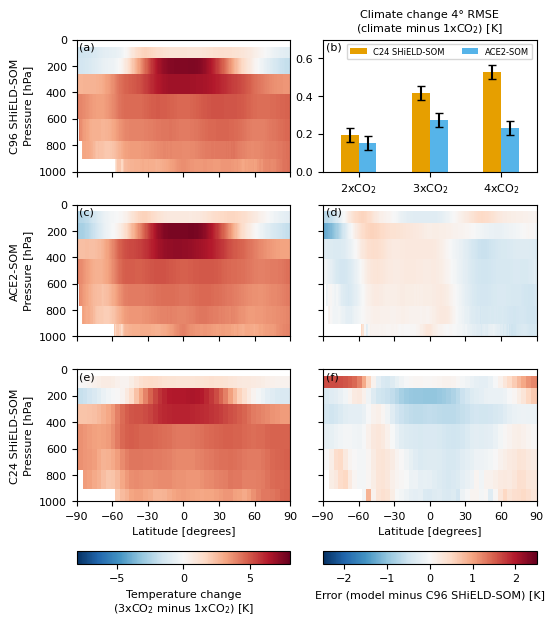

In [16]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6), (cax1, cax2) = faceted.faceted(
    3,
    2,
    aspect=0.618,
    width=5.5,
    cbar_mode="edge",
    cbar_location="bottom",
    sharex=False,
    sharey=False,
    top_pad=0.5,
    right_pad=0.1,
    left_pad=0.8,
    bottom_pad=0.6,
)

kwargs = {"vmin": -8, "vmax": 8, "cmap": "RdBu_r"}
variable = "air_temperature"

p = pcolormesh_with_interfaces(ax1, one_degree_lat_bnds, standard_interfaces, one_degree_climate_change[variable].sel(climate="3xCO2", model="SHiELD-SOM-C96").transpose("pressure", "lat"), **kwargs)
p = pcolormesh_with_interfaces(ax3, one_degree_lat_bnds, standard_interfaces, one_degree_climate_change[variable].sel(climate="3xCO2", model="ACE2-SOM-multi-climate-RS3").transpose("pressure", "lat"), **kwargs)
p = pcolormesh_with_interfaces(ax5, four_degree_lat_bnds, standard_interfaces, four_degree_climate_change[variable].sel(climate="3xCO2", model="SHiELD-SOM-C24-tuned-cdmbgwd").transpose("pressure", "lat"), **kwargs)

kwargs = {"vmin": -2.5, "vmax": 2.5, "cmap": "RdBu_r"}
p2 = pcolormesh_with_interfaces(ax4, one_degree_lat_bnds, standard_interfaces, one_degree_climate_change_error[variable].sel(climate="3xCO2", model="ACE2-SOM-multi-climate-RS3").transpose("pressure", "lat"), **kwargs)
p2 = pcolormesh_with_interfaces(ax6, four_degree_lat_bnds, standard_interfaces, four_degree_climate_change_error[variable].sel(climate="3xCO2", model="SHiELD-SOM-C24-tuned-cdmbgwd").transpose("pressure", "lat"), **kwargs)

for ax in (ax1, ax3, ax4):
    ax.set_xlabel("")
    ax.set_xticks(np.arange(-90, 91, 30))
    ax.set_xticklabels([])

for ax in (ax5, ax6):
    ax.set_xticks(np.arange(-90, 91, 30))
    ax.set_xlabel("Latitude [degrees]")

for ax in (ax1, ax3, ax5):
    ax.set_yticks(np.arange(0, 100001, 20000))
    ax.set_yticklabels(np.arange(0, 1001, 200))
    ax.set_ylabel("Pressure [hPa]")

for ax in (ax4, ax6):
    ax.set_ylabel("")
    ax.set_yticks(np.arange(0, 100001, 20000))
    ax.set_yticklabels([])

colors = ["C1", "C0"]
labels = ["C24 SHiELD-SOM", "ACE2-SOM"]
yerr = 2 * climate_change_stddev[variable].item()
(
    four_degree_rmse[variable]
    .sel(model=["SHiELD-SOM-C24-tuned-cdmbgwd", "ACE2-SOM-multi-climate-RS3"])
    .to_dataframe()
    .unstack(level=-2)
    .plot.bar(
        ax=ax2,
        color=colors,
        label="_no_legend_",
        legend=False,
        yerr=yerr,
        capsize=3,
    )
)
ax2.set_xticklabels(["2xCO$_2$", "3xCO$_2$", "4xCO$_2$"], rotation=0)
ax2.set_xlabel("")
ax2.set_title("Climate change 4° RMSE\n(climate minus 1xCO$_2$) [K]")
ax2.legend(labels, ncol=2, fontsize=6)
ax2.set_ylim(0, 0.7)

for ax in (ax1, ax3, ax4, ax5, ax6):
    ax.set_title("")

ax1.annotate(
    "C96 SHiELD-SOM",
    xy=(-0.2, 0.5),
    xytext=(-10, 0),
    xycoords="axes fraction",
    textcoords="offset points",
    ha="right",
    va="center",
    rotation=90,
)
ax3.annotate(
    "ACE2-SOM",
    xy=(-0.2, 0.5),
    xytext=(-10, 0),
    xycoords="axes fraction",
    textcoords="offset points",
    ha="right",
    va="center",
    rotation=90,
)
ax5.annotate(
    "C24 SHiELD-SOM",
    xy=(-0.2, 0.5),
    xytext=(-10, 0),
    xycoords="axes fraction",
    textcoords="offset points",
    ha="right",
    va="center",
    rotation=90,
)

for ax, label in zip((ax1, ax2, ax3, ax4, ax5, ax6), string.ascii_lowercase):
    ax.annotate(
        f"({label})",
        xy=(0, 1),
        xytext=(2, -2),
        va="top",
        xycoords="axes fraction",
        textcoords="offset points",
    )

fig.colorbar(p, cax=cax1, orientation="horizontal", label="Temperature change\n(3xCO$_2$ minus 1xCO$_2$) [K]")
fig.colorbar(p2, cax=cax2, orientation="horizontal", label="Error (model minus C96 SHiELD-SOM) [K]")

fig.savefig("figures/figure-04.png", dpi=200)
fig.savefig("figures/figure-04.pdf", dpi=200)



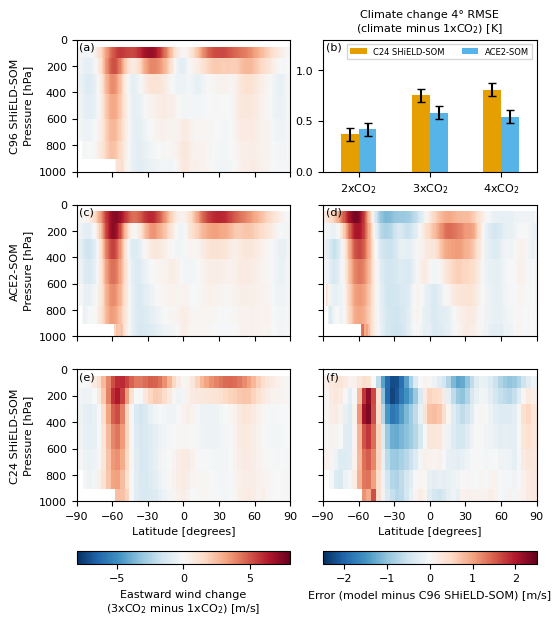

In [17]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6), (cax1, cax2) = faceted.faceted(
    3,
    2,
    aspect=0.618,
    width=5.5,
    cbar_mode="edge",
    cbar_location="bottom",
    sharex=False,
    sharey=False,
    top_pad=0.5,
    right_pad=0.1,
    left_pad=0.8,
    bottom_pad=0.6,
)

kwargs = {"vmin": -8, "vmax": 8, "cmap": "RdBu_r"}
variable = "eastward_wind"

p = pcolormesh_with_interfaces(ax1, one_degree_lat_bnds, standard_interfaces, one_degree_climate_change[variable].sel(climate="3xCO2", model="SHiELD-SOM-C96").transpose("pressure", "lat"), **kwargs)
p = pcolormesh_with_interfaces(ax3, one_degree_lat_bnds, standard_interfaces, one_degree_climate_change[variable].sel(climate="3xCO2", model="ACE2-SOM-multi-climate-RS3").transpose("pressure", "lat"), **kwargs)
p = pcolormesh_with_interfaces(ax5, four_degree_lat_bnds, standard_interfaces, four_degree_climate_change[variable].sel(climate="3xCO2", model="SHiELD-SOM-C24-tuned-cdmbgwd").transpose("pressure", "lat"), **kwargs)

kwargs = {"vmin": -2.5, "vmax": 2.5, "cmap": "RdBu_r"}
p2 = pcolormesh_with_interfaces(ax4, one_degree_lat_bnds, standard_interfaces, one_degree_climate_change_error[variable].sel(climate="3xCO2", model="ACE2-SOM-multi-climate-RS3").transpose("pressure", "lat"), **kwargs)
p2 = pcolormesh_with_interfaces(ax6, four_degree_lat_bnds, standard_interfaces, four_degree_climate_change_error[variable].sel(climate="3xCO2", model="SHiELD-SOM-C24-tuned-cdmbgwd").transpose("pressure", "lat"), **kwargs)

for ax in (ax1, ax3, ax4):
    ax.set_xlabel("")
    ax.set_xticks(np.arange(-90, 91, 30))
    ax.set_xticklabels([])

for ax in (ax5, ax6):
    ax.set_xticks(np.arange(-90, 91, 30))
    ax.set_xlabel("Latitude [degrees]")

for ax in (ax1, ax3, ax5):
    ax.set_yticks(np.arange(0, 100001, 20000))
    ax.set_yticklabels(np.arange(0, 1001, 200))
    ax.set_ylabel("Pressure [hPa]")

for ax in (ax4, ax6):
    ax.set_ylabel("")
    ax.set_yticks(np.arange(0, 100001, 20000))
    ax.set_yticklabels([])

colors = ["C1", "C0"]
labels = ["C24 SHiELD-SOM", "ACE2-SOM"]
yerr = 2 * climate_change_stddev[variable].item()
(
    four_degree_rmse[variable]
    .sel(model=["SHiELD-SOM-C24-tuned-cdmbgwd", "ACE2-SOM-multi-climate-RS3"])
    .to_dataframe()
    .unstack(level=-2)
    .plot.bar(
        ax=ax2,
        color=colors,
        label="_no_legend_",
        legend=False,
        yerr=yerr,
        capsize=3,
    )
)
ax2.set_xticklabels(["2xCO$_2$", "3xCO$_2$", "4xCO$_2$"], rotation=0)
ax2.set_xlabel("")
ax2.set_title("Climate change 4° RMSE\n(climate minus 1xCO$_2$) [K]")
ax2.legend(labels, ncol=2, fontsize=6)
ax2.set_ylim(0, 1.3)

for ax in (ax1, ax3, ax4, ax5, ax6):
    ax.set_title("")

ax1.annotate(
    "C96 SHiELD-SOM",
    xy=(-0.2, 0.5),
    xytext=(-10, 0),
    xycoords="axes fraction",
    textcoords="offset points",
    ha="right",
    va="center",
    rotation=90,
)
ax3.annotate(
    "ACE2-SOM",
    xy=(-0.2, 0.5),
    xytext=(-10, 0),
    xycoords="axes fraction",
    textcoords="offset points",
    ha="right",
    va="center",
    rotation=90,
)
ax5.annotate(
    "C24 SHiELD-SOM",
    xy=(-0.2, 0.5),
    xytext=(-10, 0),
    xycoords="axes fraction",
    textcoords="offset points",
    ha="right",
    va="center",
    rotation=90,
)

for ax, label in zip((ax1, ax2, ax3, ax4, ax5, ax6), string.ascii_lowercase):
    ax.annotate(
        f"({label})",
        xy=(0, 1),
        xytext=(2, -2),
        va="top",
        xycoords="axes fraction",
        textcoords="offset points",
    )

fig.colorbar(p, cax=cax1, orientation="horizontal", label="Eastward wind change\n(3xCO$_2$ minus 1xCO$_2$) [m/s]")
fig.colorbar(p2, cax=cax2, orientation="horizontal", label="Error (model minus C96 SHiELD-SOM) [m/s]")

fig.savefig("figures/figure-04-eastward-wind.png", dpi=200)
fig.savefig("figures/figure-04-eastward-wind.pdf", dpi=200)

